<a href="https://colab.research.google.com/github/panchamdesai777/Deep-Learning/blob/master/Zimnat_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost==1.1.1

     |████████████████████████████████| 127.6MB 82kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
pip install catboost

     |████████████████████████████████| 65.9MB 59kB/s 


In [ ]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
#from reg_resampler import resampler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path='/content/gdrive/My Drive/zimnat reccomendation/Train_clean-2.csv'
train=pd.read_csv(path)
train.head(100)


,ID,sex,marital_status,birth_year,branch_code,occupation_category_code,PCODE,ID X PCODE,date,join_month,join_year,Age,age_group,occupation_code_counts,occupation_PCODE_counts,sex_marital_age_PCODE_counts,occupation_joinmonth_PCODE_counts,Age_PCODE_counts,Joinyear_PCODE_counts,Label,popular_occupation_pcode_score
0,4WKQSBB,0,1,1987,0,5,15,4WKQSBB X P5DA,2.00,1.00,2019.00,32.00,2.00,148869,274,230,7089,1056,8904,0,2
1,CP5S02H,0,1,1981,11,5,15,CP5S02H X P5DA,6.00,1.00,2019.00,38.00,2.00,148869,819,264,7089,1067,8904,0,4
2,2YKDILJ,1,5,1991,3,1,15,2YKDILJ X P5DA,6.00,1.00,2013.00,22.00,1.00,17976,500,26,855,330,611,0,3
3,2S9E81J,1,1,1990,0,0,15,2S9E81J X P5DA,8.00,1.00,2019.00,29.00,1.00,11025,6,537,525,964,8904,0,1
4,BHDYVFT,1,1,1990,3,5,15,BHDYVFT X P5DA,8.00,1.00,2019.00,29.00,1.00,378,6,537,18,964,8904,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,73FUEPF,0,1,1974,3,5,15,73FUEPF X P5DA,11.00,1.00,2016.00,42.00,3.00,9408,108,210,448,957,2120,0,2
96,G9HDK1M,0,4,1970,13,1,15,G9HDK1M X P5DA,12.00,1.00,2018.00,48.00,4.00,22911,83,48,1091,758,7352,0,2
97,OVOVHPQ,1,1,1989,4,1,15,OVOVHPQ X P5DA,10.00,1.00,2017.00,28.00,1.00,2604,5,422,124,812,4415,0,1
98,GOEZAWU,1,1,1977,11,5,15,GOEZAWU X P5DA,2.00,1.00,2018.00,41.00,3.00,83349,848,594,3969,972,7352,0,4


In [ ]:
path='/content/gdrive/My Drive/zimnat reccomendation/Test_clean-2.csv'
test=pd.read_csv(path)
test

,ID,sex,marital_status,birth_year,branch_code,occupation_category_code,PCODE,ID X PCODE,date,join_month,join_year,Age,age_group,occupation_code_counts,occupation_PCODE_counts,sex_marital_age_PCODE_counts,occupation_joinmonth_PCODE_counts,Age_PCODE_counts,Joinyear_PCODE_counts,popular_occupation_pcode_score
0,F86J5PC,1,1,1984,4,1,15,F86J5PC X P5DA,12.00,1.00,2018.00,34.00,2.00,693.00,7.00,667.00,33.00,1147.00,7352,1
1,H6141K3,1,1,1996,0,1,15,H6141K3 X P5DA,10.00,1.00,2019.00,23.00,1.00,6783.00,66.00,196.00,323.00,417.00,8904,2
2,RBAYUXZ,0,6,1968,11,5,15,RBAYUXZ X P5DA,1.00,1.00,2020.00,52.00,4.00,148869.00,819.00,14.00,7089.00,448.00,3158,4
3,KCBILBQ,1,1,1989,4,5,15,KCBILBQ X P5DA,2.00,1.00,2019.00,30.00,1.00,148869.00,931.00,572.00,7089.00,1039.00,8904,4
4,LSEC1ZJ,0,1,1982,11,5,15,LSEC1ZJ X P5DA,2.00,1.00,2020.00,38.00,3.00,83349.00,848.00,264.00,3969.00,1067.00,3158,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,0GMU5UH,0,1,1986,3,5,5,0GMU5UH X ECY3,4.00,1.00,2019.00,33.00,2.00,148869.00,2191.00,257.00,7089.00,1131.00,8904,4
209996,I9W11CD,1,1,1980,11,5,5,I9W11CD X ECY3,8.00,1.00,2019.00,39.00,3.00,83349.00,848.00,663.00,3969.00,1078.00,8904,4
209997,42WTEGT,1,1,1993,3,0,5,42WTEGT X ECY3,4.00,1.00,2018.00,25.00,1.00,56931.00,687.00,311.00,2711.00,606.00,7352,3
209998,8EKC4O9,0,5,1981,2,5,5,8EKC4O9 X ECY3,5.00,1.00,2015.00,34.00,2.00,148869.00,505.00,17.00,7089.00,1147.00,910,3


In [ ]:
path='/content/gdrive/My Drive/zimnat reccomendation/Train.csv'
old_train=pd.read_csv(path)
old_train.head(100)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,73FUEPF,1/11/2016,F,M,1974,748L,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
96,G9HDK1M,1/12/2018,F,S,1970,XX25,BPSA,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
97,OVOVHPQ,1/10/2017,M,M,1989,94KC,P4MD,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
98,GOEZAWU,1/2/2018,M,M,1977,UAOD,0KID,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
path='/content/gdrive/My Drive/zimnat reccomendation/Test.csv'
old_test=pd.read_csv(path)
old_test

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0GMU5UH,1/4/2019,F,M,1986,748L,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9996,I9W11CD,1/8/2019,M,M,1980,UAOD,0KID,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,42WTEGT,1/4/2018,M,M,1993,748L,SST3,56SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9998,8EKC4O9,1/5/2015,F,U,1981,49BM,2A7I,T4MS,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
true_values = []
for v in old_test.values:
  binary = v[8:]
  index = [k for k, i in enumerate(binary) if i == 1]
  for k in old_test.columns[8:][index]:
    true_values.append(v[0] + ' X ' + k)

In [ ]:
true_values

['F86J5PC X RVSZ',
 'H6141K3 X RVSZ',
 'H6141K3 X K6QO',
 'RBAYUXZ X RVSZ',
 'RBAYUXZ X K6QO',
 'KCBILBQ X RVSZ',
 'LSEC1ZJ X JZ9D',
 'EK65KRH X QBOL',
 'M3N7TLU X RVSZ',
 'QAC6HOX X RVSZ',
 'T8B9JK0 X RVSZ',
 '62M79HM X K6QO',
 'VIFSSA7 X K6QO',
 'VIFSSA7 X ECY3',
 'I8ONWLM X RVSZ',
 'B0FID1U X RIBP',
 'ZHVYJ0A X RVSZ',
 'ZHVYJ0A X QBOL',
 '1IWADO4 X 66FJ',
 '2PAL7JV X 66FJ',
 '29RYY4N X RVSZ',
 'X9NBDB4 X RVSZ',
 'X9NBDB4 X QBOL',
 'UITK6GR X K6QO',
 'JONQI5H X RIBP',
 'JONQI5H X AHXO',
 'ZV7EC7L X RVSZ',
 'BWT1QRH X K6QO',
 'BWT1QRH X QBOL',
 'C285E9K X JZ9D',
 'C285E9K X J9JW',
 'BZH5P4P X K6QO',
 '2OQOFQT X K6QO',
 'I58UV5Q X RVSZ',
 'I58UV5Q X GHYX',
 'XGUUGI1 X RVSZ',
 'XGUUGI1 X QBOL',
 'XGUUGI1 X GHYX',
 'EMVH2HP X RIBP',
 'W019HSR X RVSZ',
 '7J868QB X K6QO',
 'DSYNYH6 X RVSZ',
 'GB16H1Y X K6QO',
 'Z2B00YJ X RIBP',
 'Z2B00YJ X RVSZ',
 'HLVUKNT X K6QO',
 'F5SDCA2 X K6QO',
 'E71I179 X RVSZ',
 'FRXT1NR X K6QO',
 'C1ESAII X K6QO',
 'SREJ35I X J9JW',
 'CVSALUL X RVSZ',
 '4YK8AHG X 

In [ ]:
train.drop(['age_group','occupation_PCODE_counts', 'sex_marital_age_PCODE_counts',
       'occupation_joinmonth_PCODE_counts', 'age_group_PCODE_counts',
       'Age_PCODE_counts'],1,inplace=True)

test.drop(['age_group','occupation_PCODE_counts', 'sex_marital_age_PCODE_counts',
       'occupation_joinmonth_PCODE_counts', 'age_group_PCODE_counts',
       'Age_PCODE_counts'],1,inplace=True)

In [ ]:
train.drop(['ID','ID X PCODE'],1,inplace=True)


In [ ]:
train.drop('age_group',1,inplace=True)
test.drop('age_group',1,inplace=True)

In [ ]:
id_cols=test['ID X PCODE']


In [ ]:
test.drop(['ID','ID X PCODE'],1,inplace=True)

In [ ]:
#train['Age_PCODE']=train.groupby(['Age','PCODE'])['occupation_category_code'].transform('nunique')
#train['Age_Sex_Marital']=train.groupby(['Age','sex','marital_status','PCODE'])['occupation_category_code'].transform('nunique')
#train['Age_Sex_Marital_occupation_code']=train.groupby(['Age','sex','marital_status','PCODE'])['occupation_code_counts'].transform('nunique')
#train['Age_Sex_Marital_branch_code']=train.groupby(['Age','sex','marital_status','PCODE'])['branch_code'].transform('nunique')

#test['Age_PCODE']=test.groupby(['Age','PCODE'])['occupation_category_code'].transform('nunique')
#test['Age_Sex_Marital']=test.groupby(['Age','sex','marital_status','PCODE'])['occupation_category_code'].transform('nunique')
#test['Age_Sex_Marital_occupation_code']=test.groupby(['Age','sex','marital_status','PCODE'])['occupation_code_counts'].transform('nunique')
#test['Age_Sex_Marital_branch_code']=test.groupby(['Age','sex','marital_status','PCODE'])['branch_code'].transform('nunique')

In [ ]:
from sklearn.ensemble import StackingClassifier

# define the base models
level0 = list()
#level0.append(('xgb',XGBClassifier(random_state=9,scale_pos_weight=1)))
level0.append(('lgb',LGBMClassifier(random_state=9,scale_pos_weight=1,n_estimators=1500)))
level0.append(('cat',CatBoostClassifier(random_state=9,scale_pos_weight=1,n_estimators=1000)))

level1=XGBClassifier(random_state=9,scale_pos_weight=1)

In [ ]:
train

,sex,marital_status,birth_year,branch_code,occupation_category_code,PCODE,date,join_month,join_year,Age,age_group,occupation_code_counts,occupation_PCODE_counts,sex_marital_age_PCODE_counts,occupation_joinmonth_PCODE_counts,Age_PCODE_counts,Joinyear_PCODE_counts,Label,popular_occupation_pcode_score
0,0,1,1987,0,5,15,2.00,1.00,2019.00,32.00,2.00,148869,274,230,7089,1056,8904,0,2
1,0,1,1981,11,5,15,6.00,1.00,2019.00,38.00,2.00,148869,819,264,7089,1067,8904,0,4
2,1,5,1991,3,1,15,6.00,1.00,2013.00,22.00,1.00,17976,500,26,855,330,611,0,3
3,1,1,1990,0,0,15,8.00,1.00,2019.00,29.00,1.00,11025,6,537,525,964,8904,0,1
4,1,1,1990,3,5,15,8.00,1.00,2019.00,29.00,1.00,378,6,537,18,964,8904,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611767,0,1,1974,3,5,5,9.00,1.00,2019.00,45.00,3.00,148869,2191,193,7089,888,8904,0,4
611768,1,1,1987,13,1,5,11.00,1.00,2018.00,31.00,1.00,315,2,580,15,1043,7352,0,1
611769,1,1,1985,6,5,5,2.00,1.00,2019.00,34.00,2.00,9408,16,667,448,1147,8904,0,1
611770,1,1,1989,11,5,5,7.00,1.00,2019.00,30.00,1.00,148869,819,572,7089,1039,8904,0,4


In [ ]:
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

SEED = 42

FOLD=10
X=train.drop('Label',1)
y=(train['Label'])

Xt=test.copy()
test_preds = np.zeros((len(Xt),2))

# k-fold cross validation
scores=list()
kf = StratifiedKFold(n_splits=FOLD, shuffle=True,random_state=SEED)

model_1=XGBClassifier(random_state=9,scale_pos_weight=1)
model_2=LGBMClassifier(random_state=9,scale_pos_weight=1,n_estimators=1500)
model_3=CatBoostClassifier(random_state=9,scale_pos_weight=1,n_estimators=1000)

estimator=[('xgb',model_1),('lgb',model_2),('cat',model_3)]
# enumerate splits

for train_idx, test_idx in tqdm(kf.split(X, y)):
    # get data
    X_train, y_train = X.iloc[train_idx, :], y[train_idx]
    X_test, y_test = X.iloc[test_idx, :], y[test_idx]
    test=Xt
    # fit model
    model=VotingClassifier(estimators=estimator,voting='soft')

    model.fit(X_train,y_train)
    # evaluate model
    yhat =(model.predict_proba(X_test))
    test_preds +=(model.predict_proba(test))/FOLD
    acc=log_loss(y_test,yhat)
    
    
    # store score
    scores.append(acc)
    print('> ', acc)
    
# summarize model performance
# summarize model performance
mean_s= np.mean(scores)
std_s=np.std(scores)
print(model)
print('Mean: %.3f' % (mean_s))
print('std: %.3f' % (std_s))

Learning rate set to 0.1525
0:	learn: 0.4844966	total: 242ms	remaining: 4m 1s
1:	learn: 0.3516791	total: 448ms	remaining: 3m 43s
2:	learn: 0.2798990	total: 696ms	remaining: 3m 51s
3:	learn: 0.2458380	total: 931ms	remaining: 3m 51s
4:	learn: 0.2112585	total: 1.14s	remaining: 3m 46s
5:	learn: 0.1930164	total: 1.35s	remaining: 3m 44s
6:	learn: 0.1785602	total: 1.54s	remaining: 3m 38s
7:	learn: 0.1708811	total: 1.76s	remaining: 3m 38s
8:	learn: 0.1658031	total: 1.97s	remaining: 3m 37s
9:	learn: 0.1596441	total: 2.18s	remaining: 3m 35s
10:	learn: 0.1552199	total: 2.4s	remaining: 3m 35s
11:	learn: 0.1527382	total: 2.6s	remaining: 3m 33s
12:	learn: 0.1503742	total: 2.8s	remaining: 3m 32s
13:	learn: 0.1495161	total: 3.02s	remaining: 3m 32s
14:	learn: 0.1478656	total: 3.25s	remaining: 3m 33s
15:	learn: 0.1472241	total: 3.44s	remaining: 3m 31s
16:	learn: 0.1460001	total: 3.65s	remaining: 3m 31s
17:	learn: 0.1455388	total: 3.86s	remaining: 3m 30s
18:	learn: 0.1445802	total: 4.07s	remaining: 3m 30

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10402416792522576
Learning rate set to 0.1525
0:	learn: 0.4845593	total: 229ms	remaining: 3m 48s
1:	learn: 0.3708958	total: 420ms	remaining: 3m 29s
2:	learn: 0.2855597	total: 624ms	remaining: 3m 27s
3:	learn: 0.2363705	total: 809ms	remaining: 3m 21s
4:	learn: 0.2145347	total: 1.02s	remaining: 3m 23s
5:	learn: 0.1936238	total: 1.21s	remaining: 3m 21s
6:	learn: 0.1789179	total: 1.42s	remaining: 3m 20s
7:	learn: 0.1734589	total: 1.6s	remaining: 3m 19s
8:	learn: 0.1653407	total: 1.81s	remaining: 3m 19s
9:	learn: 0.1624744	total: 2.03s	remaining: 3m 20s
10:	learn: 0.1578538	total: 2.25s	remaining: 3m 21s
11:	learn: 0.1546764	total: 2.47s	remaining: 3m 23s
12:	learn: 0.1525592	total: 2.66s	remaining: 3m 21s
13:	learn: 0.1500393	total: 2.85s	remaining: 3m 21s
14:	learn: 0.1484787	total: 3.06s	remaining: 3m 21s
15:	learn: 0.1468228	total: 3.29s	remaining: 3m 22s
16:	learn: 0.1457432	total: 3.51s	remaining: 3m 23s
17:	learn: 0.1452021	total: 3.71s	remaining: 3m 22s
18:	learn: 0.1442770	tot

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.1050908486084261
Learning rate set to 0.1525
0:	learn: 0.4845103	total: 216ms	remaining: 3m 35s
1:	learn: 0.3709127	total: 422ms	remaining: 3m 30s
2:	learn: 0.2856667	total: 640ms	remaining: 3m 32s
3:	learn: 0.2438012	total: 860ms	remaining: 3m 34s
4:	learn: 0.2099432	total: 1.07s	remaining: 3m 33s
5:	learn: 0.1895489	total: 1.28s	remaining: 3m 31s
6:	learn: 0.1771983	total: 1.47s	remaining: 3m 28s
7:	learn: 0.1690828	total: 1.68s	remaining: 3m 28s
8:	learn: 0.1638916	total: 1.89s	remaining: 3m 28s
9:	learn: 0.1589211	total: 2.12s	remaining: 3m 29s
10:	learn: 0.1554180	total: 2.33s	remaining: 3m 29s
11:	learn: 0.1526074	total: 2.53s	remaining: 3m 28s
12:	learn: 0.1508649	total: 2.74s	remaining: 3m 28s
13:	learn: 0.1484695	total: 2.96s	remaining: 3m 28s
14:	learn: 0.1475659	total: 3.16s	remaining: 3m 27s
15:	learn: 0.1462537	total: 3.4s	remaining: 3m 28s
16:	learn: 0.1452055	total: 3.6s	remaining: 3m 28s
17:	learn: 0.1431504	total: 3.85s	remaining: 3m 30s
18:	learn: 0.1423380	total

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10420922019523522
Learning rate set to 0.1525
0:	learn: 0.4844054	total: 271ms	remaining: 4m 31s
1:	learn: 0.3707480	total: 498ms	remaining: 4m 8s
2:	learn: 0.2854367	total: 719ms	remaining: 3m 58s
3:	learn: 0.2372830	total: 917ms	remaining: 3m 48s
4:	learn: 0.2157184	total: 1.18s	remaining: 3m 54s
5:	learn: 0.1923687	total: 1.38s	remaining: 3m 49s
6:	learn: 0.1786478	total: 1.59s	remaining: 3m 46s
7:	learn: 0.1719387	total: 1.84s	remaining: 3m 48s
8:	learn: 0.1638156	total: 2.05s	remaining: 3m 45s
9:	learn: 0.1585174	total: 2.29s	remaining: 3m 47s
10:	learn: 0.1561229	total: 2.52s	remaining: 3m 47s
11:	learn: 0.1524277	total: 2.75s	remaining: 3m 46s
12:	learn: 0.1501222	total: 2.99s	remaining: 3m 47s
13:	learn: 0.1491511	total: 3.21s	remaining: 3m 46s
14:	learn: 0.1468347	total: 3.44s	remaining: 3m 46s
15:	learn: 0.1457670	total: 3.69s	remaining: 3m 47s
16:	learn: 0.1436046	total: 3.92s	remaining: 3m 46s
17:	learn: 0.1430268	total: 4.14s	remaining: 3m 45s
18:	learn: 0.1421845	tot

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10498638598854274
Learning rate set to 0.1525
0:	learn: 0.4848381	total: 234ms	remaining: 3m 53s
1:	learn: 0.3520791	total: 455ms	remaining: 3m 47s
2:	learn: 0.2822561	total: 684ms	remaining: 3m 47s
3:	learn: 0.2479858	total: 909ms	remaining: 3m 46s
4:	learn: 0.2126386	total: 1.13s	remaining: 3m 44s
5:	learn: 0.1930330	total: 1.32s	remaining: 3m 39s
6:	learn: 0.1790773	total: 1.53s	remaining: 3m 37s
7:	learn: 0.1707271	total: 1.75s	remaining: 3m 37s
8:	learn: 0.1634957	total: 1.95s	remaining: 3m 34s
9:	learn: 0.1579758	total: 2.17s	remaining: 3m 34s
10:	learn: 0.1561145	total: 2.4s	remaining: 3m 36s
11:	learn: 0.1527949	total: 2.62s	remaining: 3m 35s
12:	learn: 0.1505310	total: 2.82s	remaining: 3m 34s
13:	learn: 0.1490883	total: 3.04s	remaining: 3m 34s
14:	learn: 0.1475031	total: 3.26s	remaining: 3m 34s
15:	learn: 0.1464451	total: 3.5s	remaining: 3m 35s
16:	learn: 0.1457949	total: 3.72s	remaining: 3m 35s
17:	learn: 0.1448510	total: 3.95s	remaining: 3m 35s
18:	learn: 0.1444579	tota

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10305648783035881
Learning rate set to 0.1525
0:	learn: 0.4845553	total: 213ms	remaining: 3m 32s
1:	learn: 0.3708983	total: 407ms	remaining: 3m 22s
2:	learn: 0.2855239	total: 610ms	remaining: 3m 22s
3:	learn: 0.2526303	total: 809ms	remaining: 3m 21s
4:	learn: 0.2153816	total: 1.01s	remaining: 3m 20s
5:	learn: 0.1945363	total: 1.23s	remaining: 3m 24s
6:	learn: 0.1797727	total: 1.43s	remaining: 3m 22s
7:	learn: 0.1749093	total: 1.65s	remaining: 3m 24s
8:	learn: 0.1700429	total: 1.88s	remaining: 3m 27s
9:	learn: 0.1630132	total: 2.09s	remaining: 3m 27s
10:	learn: 0.1579030	total: 2.32s	remaining: 3m 28s
11:	learn: 0.1526074	total: 2.53s	remaining: 3m 28s
12:	learn: 0.1503558	total: 2.76s	remaining: 3m 29s
13:	learn: 0.1484084	total: 2.98s	remaining: 3m 29s
14:	learn: 0.1469397	total: 3.2s	remaining: 3m 30s
15:	learn: 0.1463239	total: 3.41s	remaining: 3m 29s
16:	learn: 0.1451878	total: 3.63s	remaining: 3m 30s
17:	learn: 0.1445567	total: 3.87s	remaining: 3m 31s
18:	learn: 0.1440145	tot

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10506678953715276
Learning rate set to 0.1525
0:	learn: 0.4845793	total: 205ms	remaining: 3m 24s
1:	learn: 0.3709759	total: 390ms	remaining: 3m 14s
2:	learn: 0.2856928	total: 588ms	remaining: 3m 15s
3:	learn: 0.2528574	total: 794ms	remaining: 3m 17s
4:	learn: 0.2155598	total: 1s	remaining: 3m 20s
5:	learn: 0.1947026	total: 1.19s	remaining: 3m 17s
6:	learn: 0.1862197	total: 1.38s	remaining: 3m 15s
7:	learn: 0.1740836	total: 1.56s	remaining: 3m 14s
8:	learn: 0.1655595	total: 1.75s	remaining: 3m 12s
9:	learn: 0.1616696	total: 1.96s	remaining: 3m 13s
10:	learn: 0.1569955	total: 2.17s	remaining: 3m 15s
11:	learn: 0.1533914	total: 2.4s	remaining: 3m 17s
12:	learn: 0.1510373	total: 2.64s	remaining: 3m 20s
13:	learn: 0.1493573	total: 2.87s	remaining: 3m 22s
14:	learn: 0.1477843	total: 3.08s	remaining: 3m 22s
15:	learn: 0.1465295	total: 3.29s	remaining: 3m 22s
16:	learn: 0.1454341	total: 3.53s	remaining: 3m 23s
17:	learn: 0.1447275	total: 3.71s	remaining: 3m 22s
18:	learn: 0.1438392	total:

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10278710285415175
Learning rate set to 0.1525
0:	learn: 0.4845147	total: 220ms	remaining: 3m 39s
1:	learn: 0.3709085	total: 411ms	remaining: 3m 25s
2:	learn: 0.2856009	total: 620ms	remaining: 3m 26s
3:	learn: 0.2364663	total: 829ms	remaining: 3m 26s
4:	learn: 0.2147574	total: 1.05s	remaining: 3m 28s
5:	learn: 0.1949968	total: 1.26s	remaining: 3m 29s
6:	learn: 0.1798496	total: 1.47s	remaining: 3m 28s
7:	learn: 0.1715508	total: 1.68s	remaining: 3m 28s
8:	learn: 0.1667453	total: 1.91s	remaining: 3m 30s
9:	learn: 0.1607584	total: 2.11s	remaining: 3m 28s
10:	learn: 0.1567218	total: 2.32s	remaining: 3m 28s
11:	learn: 0.1532300	total: 2.54s	remaining: 3m 28s
12:	learn: 0.1506380	total: 2.75s	remaining: 3m 28s
13:	learn: 0.1497885	total: 2.95s	remaining: 3m 27s
14:	learn: 0.1486583	total: 3.14s	remaining: 3m 26s
15:	learn: 0.1479582	total: 3.36s	remaining: 3m 26s
16:	learn: 0.1464564	total: 3.55s	remaining: 3m 25s
17:	learn: 0.1455266	total: 3.76s	remaining: 3m 25s
18:	learn: 0.1442850	to

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.1042356094563902
Learning rate set to 0.1525
0:	learn: 0.4846658	total: 228ms	remaining: 3m 47s
1:	learn: 0.3709880	total: 436ms	remaining: 3m 37s
2:	learn: 0.2856513	total: 635ms	remaining: 3m 30s
3:	learn: 0.2438822	total: 843ms	remaining: 3m 29s
4:	learn: 0.2099709	total: 1.03s	remaining: 3m 24s
5:	learn: 0.1895717	total: 1.23s	remaining: 3m 24s
6:	learn: 0.1771914	total: 1.43s	remaining: 3m 22s
7:	learn: 0.1695123	total: 1.62s	remaining: 3m 20s
8:	learn: 0.1629016	total: 1.8s	remaining: 3m 18s
9:	learn: 0.1595698	total: 1.98s	remaining: 3m 16s
10:	learn: 0.1566718	total: 2.17s	remaining: 3m 15s
11:	learn: 0.1532548	total: 2.37s	remaining: 3m 15s
12:	learn: 0.1502701	total: 2.6s	remaining: 3m 17s
13:	learn: 0.1481669	total: 2.81s	remaining: 3m 17s
14:	learn: 0.1463488	total: 3.02s	remaining: 3m 18s
15:	learn: 0.1457450	total: 3.23s	remaining: 3m 18s
16:	learn: 0.1447304	total: 3.47s	remaining: 3m 20s
17:	learn: 0.1441716	total: 3.7s	remaining: 3m 21s
18:	learn: 0.1420098	total:

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10293841884333542
Learning rate set to 0.1525
0:	learn: 0.4847029	total: 200ms	remaining: 3m 19s
1:	learn: 0.3711583	total: 415ms	remaining: 3m 27s
2:	learn: 0.2858473	total: 624ms	remaining: 3m 27s
3:	learn: 0.2440214	total: 839ms	remaining: 3m 29s
4:	learn: 0.2101039	total: 1.03s	remaining: 3m 24s
5:	learn: 0.1897162	total: 1.22s	remaining: 3m 21s
6:	learn: 0.1773718	total: 1.42s	remaining: 3m 22s
7:	learn: 0.1686209	total: 1.6s	remaining: 3m 19s
8:	learn: 0.1637448	total: 1.8s	remaining: 3m 18s
9:	learn: 0.1584674	total: 1.99s	remaining: 3m 17s
10:	learn: 0.1562516	total: 2.18s	remaining: 3m 15s
11:	learn: 0.1546662	total: 2.35s	remaining: 3m 13s
12:	learn: 0.1513977	total: 2.55s	remaining: 3m 13s
13:	learn: 0.1495385	total: 2.76s	remaining: 3m 14s
14:	learn: 0.1480835	total: 3s	remaining: 3m 17s
15:	learn: 0.1468588	total: 3.2s	remaining: 3m 17s
16:	learn: 0.1456916	total: 3.4s	remaining: 3m 16s
17:	learn: 0.1448915	total: 3.59s	remaining: 3m 15s
18:	learn: 0.1445023	total: 3.

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                          

>  0.10227696459821653

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
  

weight correction
logloss for 0.990:0.099523
logloss for 0.991:0.099523
logloss for 0.992:0.099523
logloss for 0.993:0.099523
logloss for 0.994:0.099523
logloss for 0.995:0.099523
logloss for 0.996:0.099523
logloss for 0.997:0.099523
logloss for 0.998:0.099523
logloss for 0.999:0.099523
logloss for 1.000:0.099523
logloss for 1.001:0.099523
logloss for 1.002:0.099523
logloss for 1.003:0.099523
logloss for 1.004:0.099523
logloss for 1.005:0.099523
logloss for 1.006:0.099523
logloss for 1.007:0.099523
logloss for 1.008:0.099522
logloss for 1.009:0.099522


Best weight for Score:1.01   0.10
dtype: float64


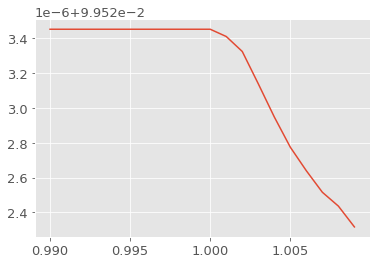

In [ ]:
pred1  = model.predict_proba(X_test)
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = log_loss(y_test,pred1*w)
    print('logloss for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

In [ ]:
test_preds=pd.DataFrame(test_preds)
test_preds_1=np.clip(test_preds,0.025,0.975)
test_Preds_w=test_preds

In [ ]:
test_preds.columns=['0','Label']
test_preds_1.columns=['0','Label']
test_Preds_w.columns=['0','Label']

In [ ]:
test_Preds_w=test_Preds_w['Label']*w

In [ ]:
test_preds

,0,Label
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,1.00,0.00
...,...,...
209995,0.99,0.01
209996,0.98,0.02
209997,1.00,0.00
209998,0.97,0.03


In [ ]:
test_preds_1

,0,Label
0,0.97,0.03
1,0.97,0.03
2,0.97,0.03
3,0.97,0.03
4,0.97,0.03
...,...,...
209995,0.97,0.03
209996,0.97,0.03
209997,0.97,0.03
209998,0.97,0.03


In [ ]:
test_Preds_w

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
209995   0.01
209996   0.02
209997   0.00
209998   0.01
209999   0.03
Name: Label, Length: 210000, dtype: float64

In [ ]:

final_voting_1=pd.concat([id_cols,test_preds['Label']],1)

In [ ]:
final_voting_2=pd.concat([id_cols,test_preds_1['Label']],1)

In [ ]:
final_voting_3=pd.concat([id_cols,test_Preds_w],1)

In [ ]:
final_voting_1.columns = ['ID X PCODE', 'Label']
for i in range(final_voting_1.shape[0]):
  if final_voting_1['ID X PCODE'].iloc[i] in true_values:
    final_voting_1['Label'].iloc[i] = 1.0



In [ ]:
final_voting_1['Label'].value_counts()

1.00    12853
0.00        8
0.00        8
0.00        8
0.00        8
        ...  
0.01        1
0.02        1
0.00        1
0.03        1
0.00        1
Name: Label, Length: 184248, dtype: int64

In [ ]:
final_voting_2

,ID X PCODE,Label
0,F86J5PC X P5DA,0.03
1,H6141K3 X P5DA,0.03
2,RBAYUXZ X P5DA,0.03
3,KCBILBQ X P5DA,0.03
4,LSEC1ZJ X P5DA,0.03
...,...,...
209995,0GMU5UH X ECY3,0.03
209996,I9W11CD X ECY3,0.03
209997,42WTEGT X ECY3,0.03
209998,8EKC4O9 X ECY3,0.03


In [ ]:
final_voting_3

,ID X PCODE,Label
0,F86J5PC X P5DA,0.00
1,H6141K3 X P5DA,0.00
2,RBAYUXZ X P5DA,0.00
3,KCBILBQ X P5DA,0.00
4,LSEC1ZJ X P5DA,0.00
...,...,...
209995,0GMU5UH X ECY3,0.01
209996,I9W11CD X ECY3,0.02
209997,42WTEGT X ECY3,0.00
209998,8EKC4O9 X ECY3,0.01


In [ ]:
final_voting_1.to_csv('voting+trick.csv',index=False)

In [ ]:
final_voting_1

,ID X PCODE,Label
0,F86J5PC X P5DA,0.01
1,H6141K3 X P5DA,0.00
2,RBAYUXZ X P5DA,0.01
3,KCBILBQ X P5DA,0.00
4,LSEC1ZJ X P5DA,0.01
...,...,...
209995,0GMU5UH X ECY3,0.01
209996,I9W11CD X ECY3,0.01
209997,42WTEGT X ECY3,0.00
209998,8EKC4O9 X ECY3,0.01


In [ ]:
final_voting_2.to_csv('xgb+cat+lgb+clip.csv',index=False)

In [ ]:
final_voting_3.to_csv('cat1000+lgb1500-weighted.csv',index=False)

In [ ]:
from google.colab import files
files.download('voting+trick.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>